In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
import cv2
import imghdr

C:\Users\Shubh\AppData\Local\Temp\ipykernel_3708\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:

data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir):
    print(image_class)

edible mushroom sporocarp
poisonous mushroom sporocarp


In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Image not in ext list data\edible mushroom sporocarp\ce (422).jpg
Image not in ext list data\poisonous mushroom sporocarp\cv (592).jpg
Image not in ext list data\poisonous mushroom sporocarp\cv (604).jpg


### Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1572 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

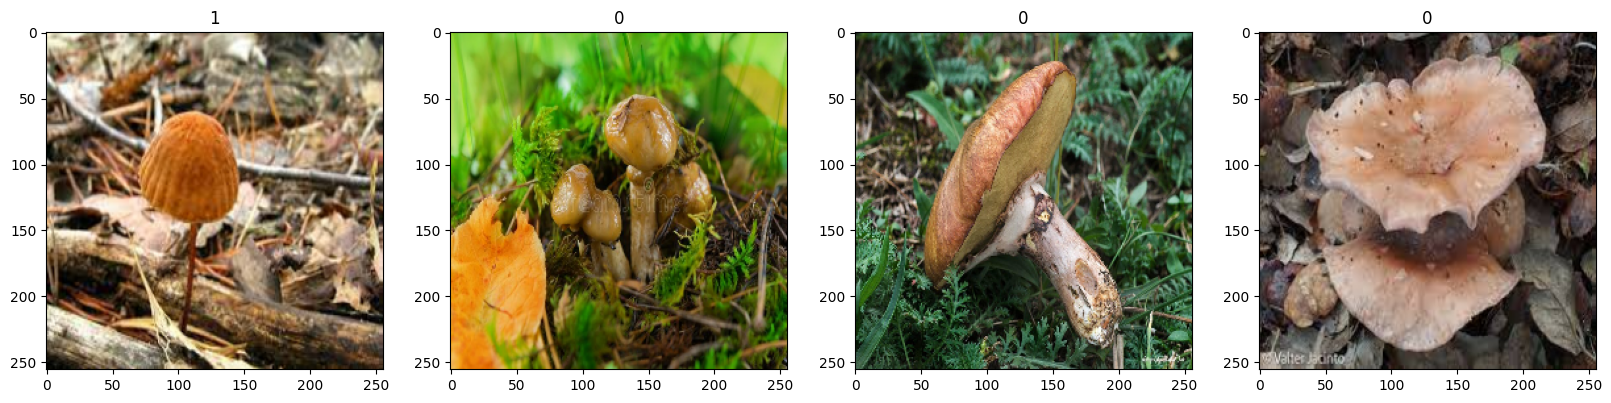

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 0 - Edible
## 1 - Poisonous

### Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))


In [18]:
data.as_numpy_iterator().next()

(array([[[[5.09803928e-02, 3.52941193e-02, 2.35294122e-02],
          [5.09803928e-02, 3.52941193e-02, 2.35294122e-02],
          [4.76332717e-02, 3.19469981e-02, 2.01822910e-02],
          ...,
          [2.54901975e-01, 9.41176489e-02, 8.62745121e-02],
          [2.54901975e-01, 9.41176489e-02, 8.62745121e-02],
          [2.54901975e-01, 9.41176489e-02, 8.62745121e-02]],
 
         [[5.09803928e-02, 3.52941193e-02, 2.35294122e-02],
          [5.09803928e-02, 3.52941193e-02, 2.35294122e-02],
          [5.00586256e-02, 3.43723521e-02, 2.26076469e-02],
          ...,
          [2.54901975e-01, 9.41176489e-02, 8.62745121e-02],
          [2.54901975e-01, 9.41176489e-02, 8.62745121e-02],
          [2.54901975e-01, 9.41176489e-02, 8.62745121e-02]],
 
         [[4.67371307e-02, 3.74157466e-02, 2.35294122e-02],
          [4.67371307e-02, 3.74157466e-02, 2.35294122e-02],
          [4.67371307e-02, 3.74157466e-02, 2.35294122e-02],
          ...,
          [2.54901975e-01, 9.41176489e-02, 8.6274

### Split Data

In [19]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size


35

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### DL Model

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

C:\Users\Shubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy']) 

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### Train

In [26]:
logdir = 'logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [30]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 35s 753ms/step - accuracy: 0.5394 - loss: 0.8000 - val_accuracy: 0.5375 - val_loss: 0.6782
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 23s 646ms/step - accuracy: 0.5564 - loss: 0.6723 - val_accuracy: 0.5875 - val_loss: 0.6618
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 773ms/step - accuracy: 0.6219 - loss: 0.6570 - val_accuracy: 0.6531 - val_loss: 0.6448
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 25s 689ms/step - accuracy: 0.6731 - loss: 0.5990 - val_accuracy: 0.6750 - val_loss: 0.6235
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 25s 700ms/step - accuracy: 0.7967 - loss: 0.4840 - val_accuracy: 0.6594 - val_loss: 0.5894
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 769ms/step - accuracy: 0.8675 - loss: 0.3181 - val_accuracy: 0.7375 - val_loss: 0.5850
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 691ms/step - accuracy: 0.9436 - loss: 0.1746 - val_accuracy: 0.7219 - val_loss: 0.5912
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 669ms/step - accuracy: 0.9550 - loss: 0.1753 - val_accu

### Evaluation

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


In [35]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8611111044883728, Recall:0.7749999761581421, Accuracy: 0.7878788113594055


### Test

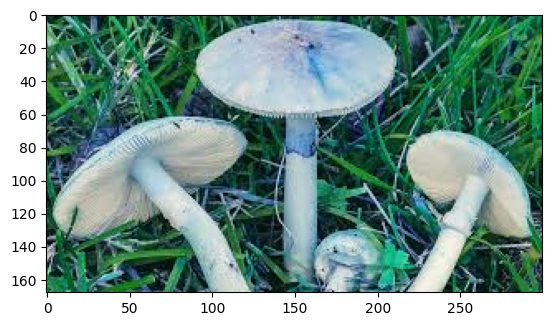

In [42]:
img = cv2.imread('test_poisonous.jpg')
plt.imshow(img)
plt.show()

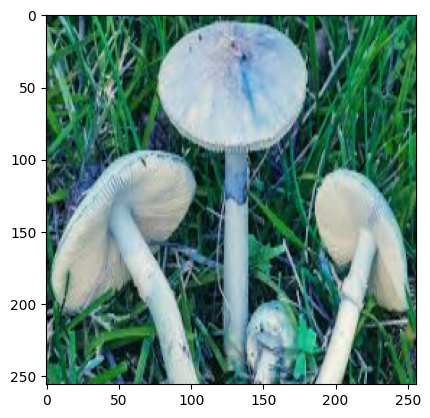

In [43]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


In [45]:
yhat

array([[0.99998385]], dtype=float32)